<h2>Prática 6</h2>
<h3>Daniel Freitas Martins - 2304</h3>

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [114]:
#df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df = pd.read_excel('../Pratica 5/Online Retail.xlsx')

In [115]:
#Filtro para remover quantidade e preço unitário negativos
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df_group_products = df.copy()
##### Fazendo strip de Description, pois havia produtos com mesmo nome começando com espaço, atrapalhando
# o agrupamento.
df_group_products['Description'] = df_group_products['Description'].str.strip()
#df_group_products['Description'] = df_group_products.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_group_products = df_group_products.groupby('Description')

<h4>1. Faça um gráfico de barras mostrando a quantidade vendida total de cada um dos 10
primeiros produtos do Dataframe.</h4>

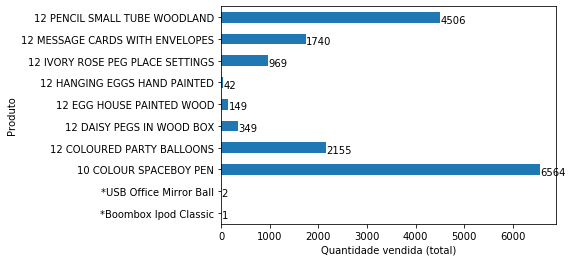

In [117]:
df_group_products_sum = df_group_products.sum()
df_group_products_sum_head = df_group_products_sum.head(10)
ax = df_group_products_sum_head['Quantity'].plot.barh()
ax.set_ylabel('Produto')
ax.set_xlabel('Quantidade vendida (total)')
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_width() + 5, p.get_y()))
plt.show()

<h2>Observação:</h2>
<p>Quando foi feita a remoção de espaços em branco antes e depois de alguns nomes de produtos, 
os dados foram reordenados, não sei o motivo... Essa remoção foi realizada devido a existência de produtos com mesmo nome mas com espaços antes ou depois, atrapalhando o agrupamento</p>

<h4>2. Faça um Boxplot dos preços unitários dos produtos. Considere somente os 100 produtos mais vendidos.</h4>

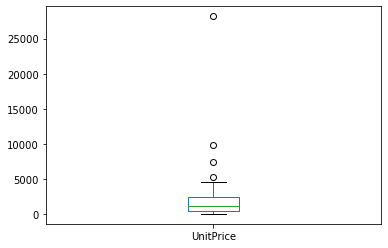

In [181]:
#.reset_index()
df_group_products_best_seller = df_group_products_sum.copy()
#df_group_products_best_seller.reset_index()
df_group_products_best_seller = df_group_products_best_seller.sort_values(by=['Quantity'], ascending=False)
ax = df_group_products_best_seller.head(100)['UnitPrice'].plot.box()
plt.show()

<h4>3. Faça um gráfico de linhas mostrando o faturamento (total de vendas) por dia.</h4>

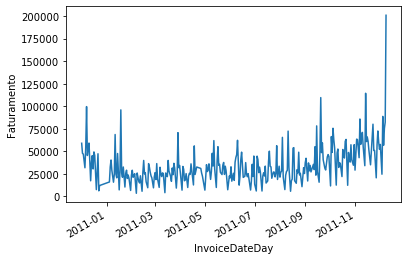

In [128]:
df['InvoiceDateDay'] = df['InvoiceDate'].dt.floor('d')
df_group_invoice_date_day = df.copy()
df_group_invoice_date_day['Description'] = df_group_invoice_date_day['Description'].str.strip()
df_group_invoice_date_day = df_group_invoice_date_day.groupby('InvoiceDateDay')
ax = df_group_invoice_date_day['TotalPrice'].sum().plot()
ax.set_ylabel('Faturamento')
plt.show()

<h4>4. Faça o histograma da média dos preços unitários dos produtos.</h4>

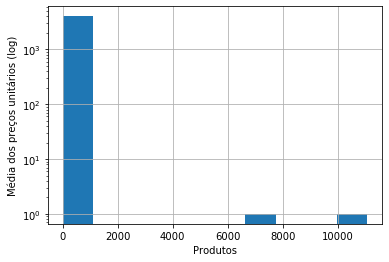

In [145]:
df_group_products_unitprices_mean = df_group_products['UnitPrice'].mean()
ax = df_group_products_unitprices_mean.hist()
plt.yscale('log')
ax.set_ylabel('Média dos preços unitários (log)')
ax.set_xlabel('Produtos')
plt.show()

<h4>5. Faça dois gráficos de barras, sendo um da quantidade de compras e outro do total
de faturamento por país.</h4>

[]

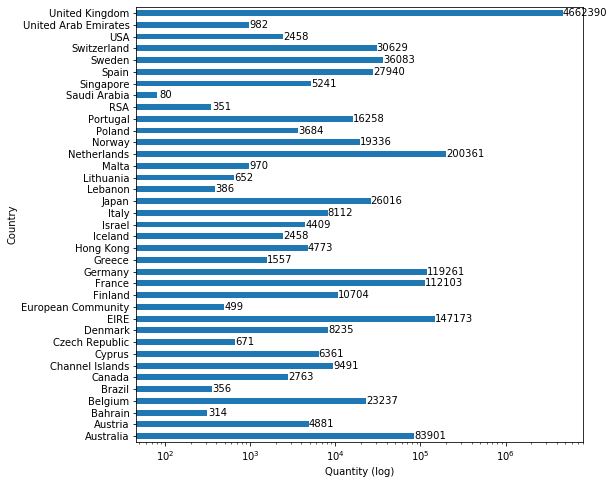

In [164]:
df_group_country = df.copy()
df_group_country['Description'] = df_group_country['Description'].str.strip()
df_group_country = df_group_country[df_group_country['Country'] != 'Unspecified']
df_group_country = df_group_country.groupby('Country', sort=True)
ax = df_group_country['Quantity'].sum().plot.barh(figsize=(8,8))
plt.xscale('log')
ax.set_xlabel('Quantity (log)')
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_width() + 5, p.get_y()))
plt.plot()

[]

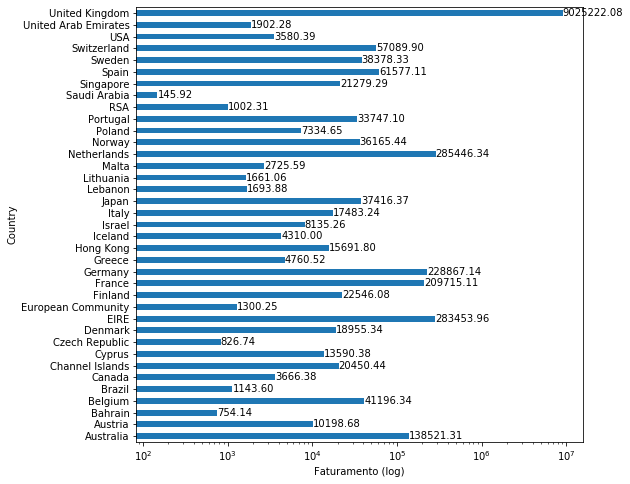

In [150]:
ax = df_group_country['TotalPrice'].sum().plot.barh(figsize=(8,8))
plt.xscale('log')
ax.set_xlabel('Faturamento (log)')
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_width()), (p.get_width() + 5, p.get_y()))
plt.plot()

<h4>6. Considerando os 100 produtos mais vendidos, é possível visualizar alguma
diferença entre a distribuição dos preços unitários desses produtos ao se comparar os
países “Australia” e “United Kingdom”? Faça um gráfico que ajude a responder.</h4>

Número de produtos na Austrália (entre os 100 mais vendidos do dataset): 
UnitPrice (Australia)    56
dtype: int64
Número de produtos no Reino Unido (entre os 100 mais vendidos do dataset): 
UnitPrice (United Kingdom)    100
dtype: int64


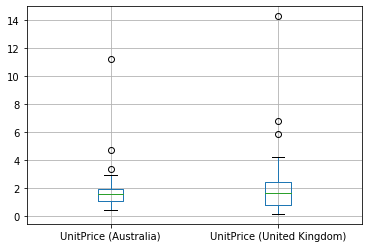

In [302]:
df_group_products_best_seller_100 = df_group_products_best_seller.head(100)
df_group_country_best_seller_100 = df.copy()
df_group_country_best_seller_100['Description'] = df_group_country_best_seller_100['Description'].str.strip()
df_group_country_best_seller_100 = df_group_country_best_seller_100[df_group_country_best_seller_100['Country'] != 'Unspecified']
df_group_products_best_seller_100_reseted = df_group_products_best_seller_100.reset_index()
lista_df_group_products_best_seller_100 = df_group_products_best_seller_100_reseted['Description']
df_group_country_best_seller_100 = df_group_country_best_seller_100[df_group_country_best_seller_100['Description'].isin(lista_df_group_products_best_seller_100)]
df_group_country_best_seller_100 = df_group_country_best_seller_100[df_group_country_best_seller_100['Country'].isin(['Australia', 'United Kingdom'])]
df_group_country_best_seller_100_australia = df_group_country_best_seller_100[df_group_country_best_seller_100['Country'] == 'Australia']
df_group_country_best_seller_100_uk = df_group_country_best_seller_100[df_group_country_best_seller_100['Country'] == 'United Kingdom']

_, ax = plt.subplots()

#ax = df_group_country_best_seller_100_australia.groupby('Description')['UnitPrice'].mean().plot.box(color='blue')
#df_group_country_best_seller_100_uk.groupby('Description')['UnitPrice'].mean().plot.box(ax=ax, color='red')
a = df_group_country_best_seller_100_australia.groupby('Description')['UnitPrice'].mean().to_frame(name="UnitPrice (Australia)")
b = df_group_country_best_seller_100_uk.groupby('Description')['UnitPrice'].mean().to_frame(name="UnitPrice (United Kingdom)")
print('Número de produtos na Austrália (entre os 100 mais vendidos do dataset): ')
print(a.count())
print('Número de produtos no Reino Unido (entre os 100 mais vendidos do dataset): ')
print(b.count())
c = pd.concat([a, b])
c.boxplot(ax=ax)

plt.show()

<p><b>Resposta</b>: Pela figura acima, pode-se inferir que a média dos preços unitários dos produtos na Austrália é menor do que no Reino Unido. No entanto, há apenas 56 produtos dos 100 mais vendidos do dataset na Australia, enquanto que todos os mais vendidos estão presentes no Reino Unido. Provavelmente uma análise diferente levaria a termos outras conclusões a respeito dessa distribuição de preços (talvez restringindo para apenas os 56 produtos mais vendidos da Austrália, por exemplo).</p>